In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC

## Import dataset

In [2]:
# training data 
training_data = pd.read_csv(r"C:\Users\dell\Desktop\assignment\SalaryData_Train.csv")

In [3]:
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
testing_data = pd.read_csv(r"C:\Users\dell\Desktop\assignment\SalaryData_Test.csv")
testing_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Initial Analysis

In [5]:
training_data.shape

(30161, 14)

In [6]:
training_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
testing_data.shape

(15060, 14)

In [9]:
testing_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
testing_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
testing_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<AxesSubplot:>

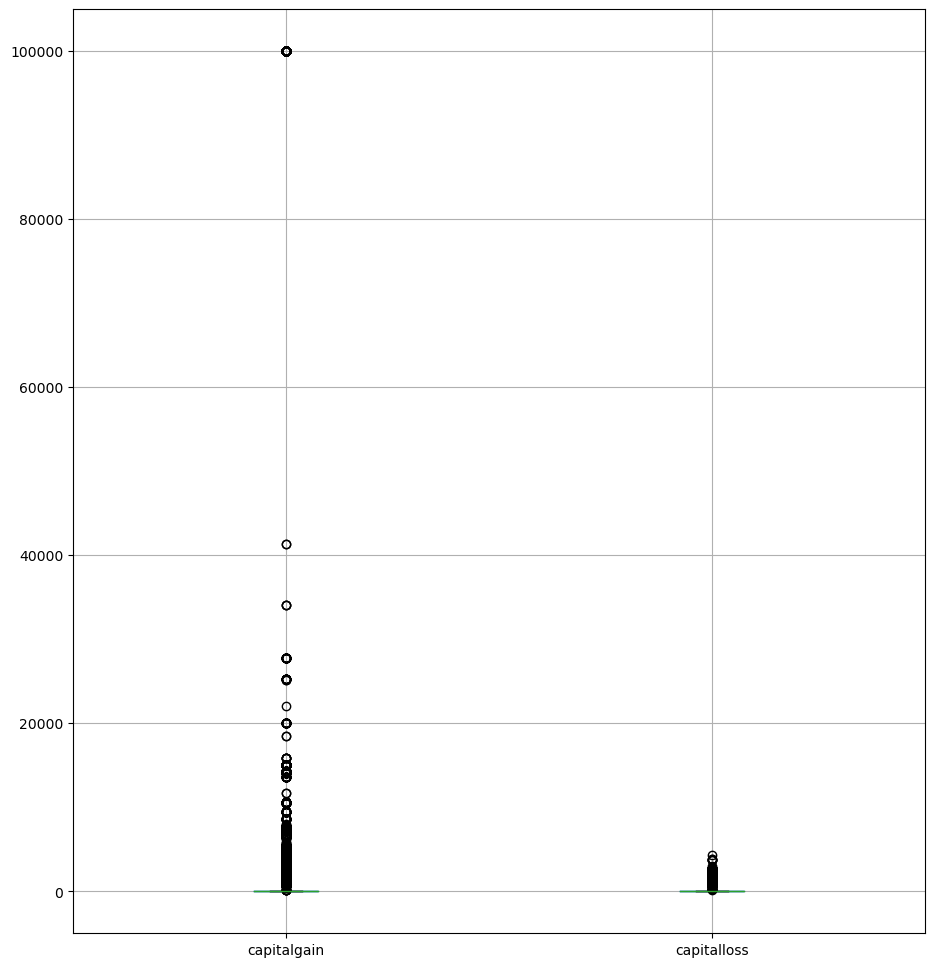

In [13]:
plt.figure(figsize= (11,12))
training_data.boxplot(column=['capitalgain','capitalloss'])

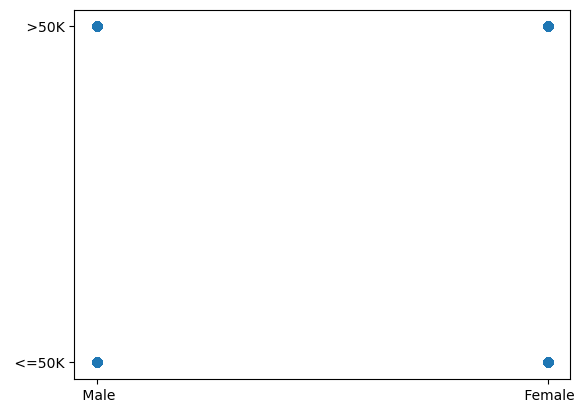

In [14]:
plt.scatter(x = 'sex',y = 'Salary',data = training_data)

In [15]:
def count_plot(data,columns):
    plt.figure(figsize=(15,10))
    for indx,var in enumerate(columns):
        plt.subplot(5,3,indx+1)
        g = sns.countplot(data[var],hue=data['Salary'])
    plt.tight_layout()
feature = training_data.columns.tolist()
feature.remove('Salary')
feature

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

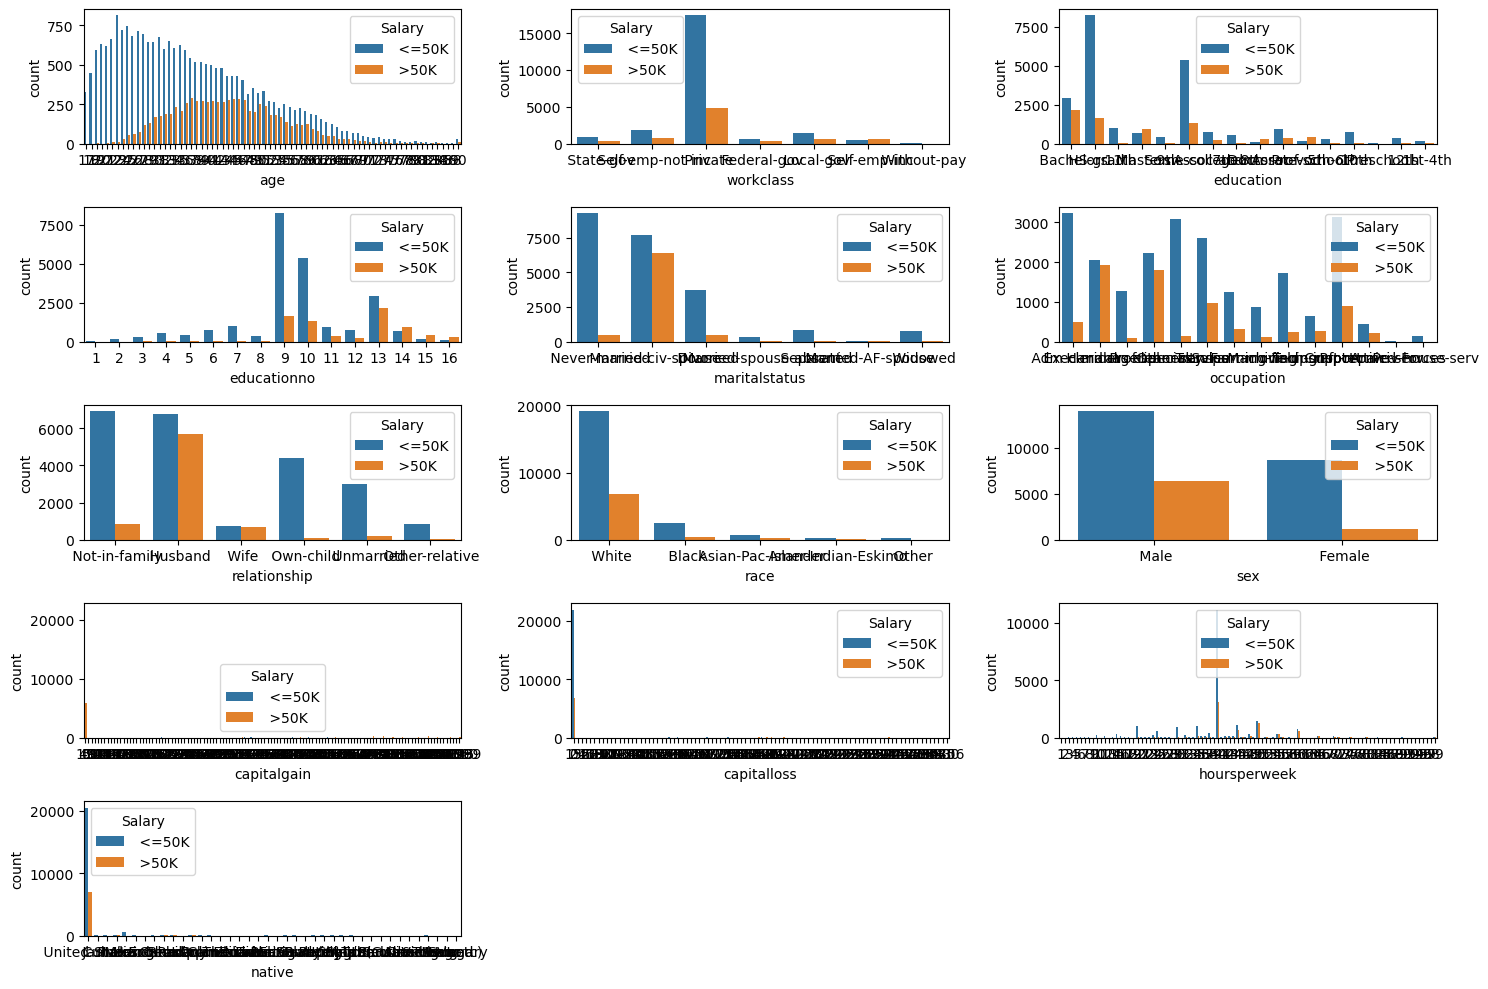

In [16]:
count_plot(training_data,feature)

In [17]:
categorical_data = training_data.select_dtypes(exclude=[np.number])

In [18]:
categorical_data

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [19]:
columns = categorical_data.columns
columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:>

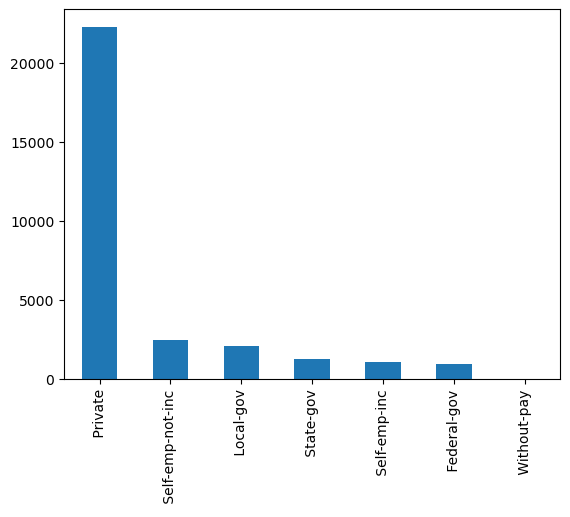

In [20]:
categorical_data['workclass'].value_counts().plot(kind ='bar')

<AxesSubplot:>

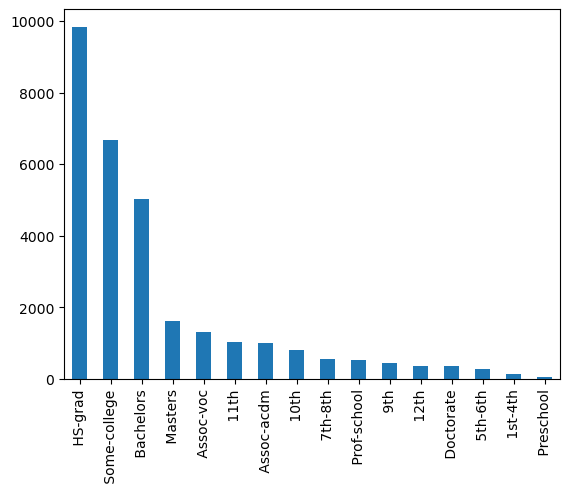

In [21]:
categorical_data['education'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

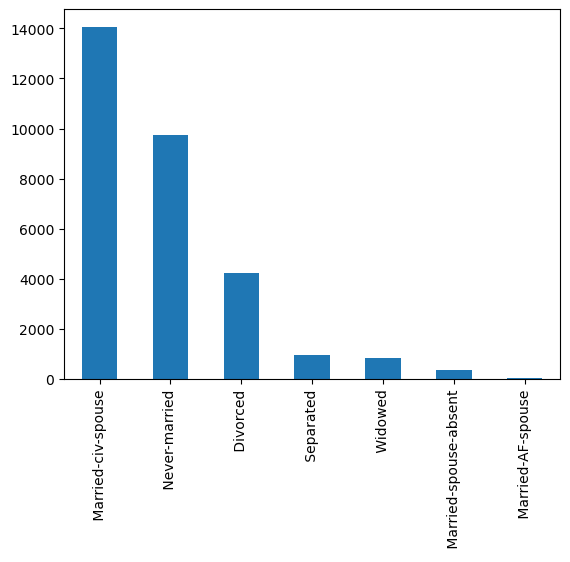

In [22]:
categorical_data['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

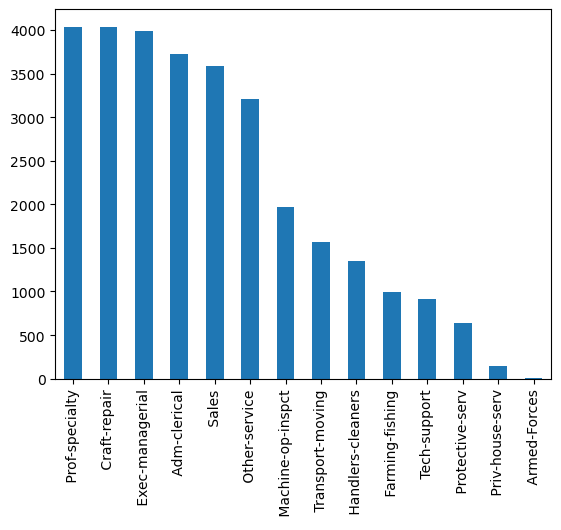

In [23]:
categorical_data['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

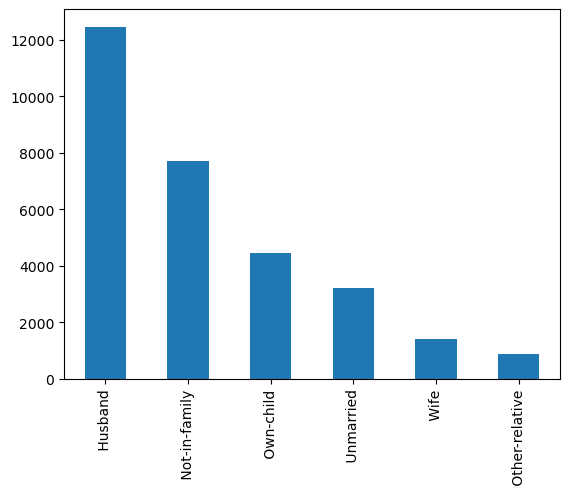

In [24]:
categorical_data['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

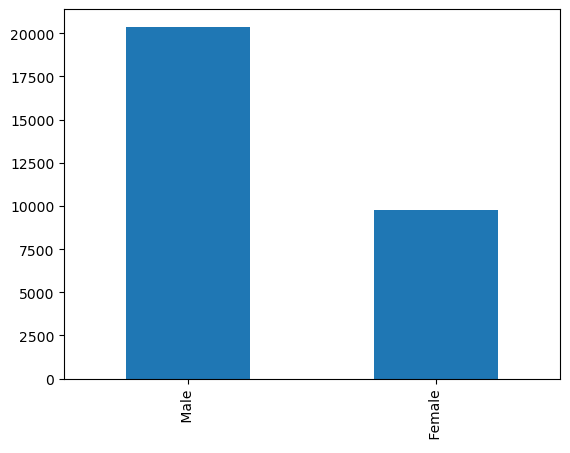

In [25]:
categorical_data['sex'].value_counts().plot(kind = 'bar')

In [26]:
categorical_testing = testing_data.select_dtypes(exclude=[np.number])

In [27]:
categorical_testing

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [28]:
categorical_testing.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:>

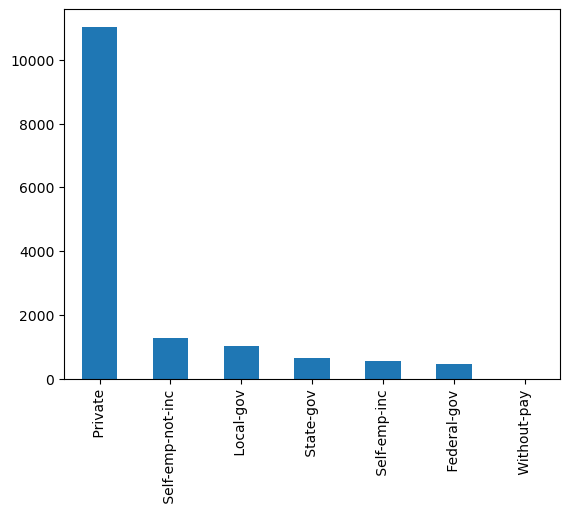

In [29]:
categorical_testing['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

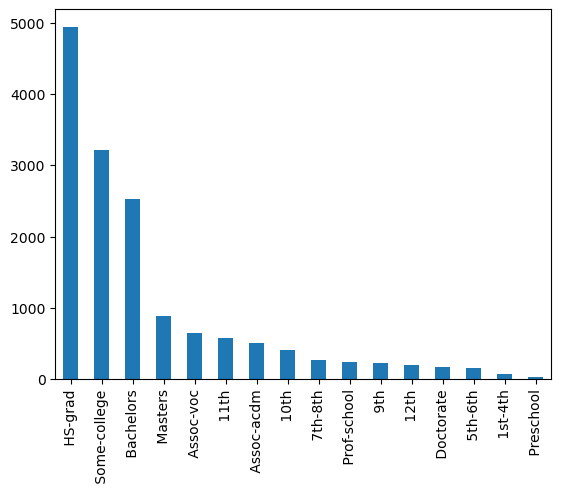

In [30]:
categorical_testing['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

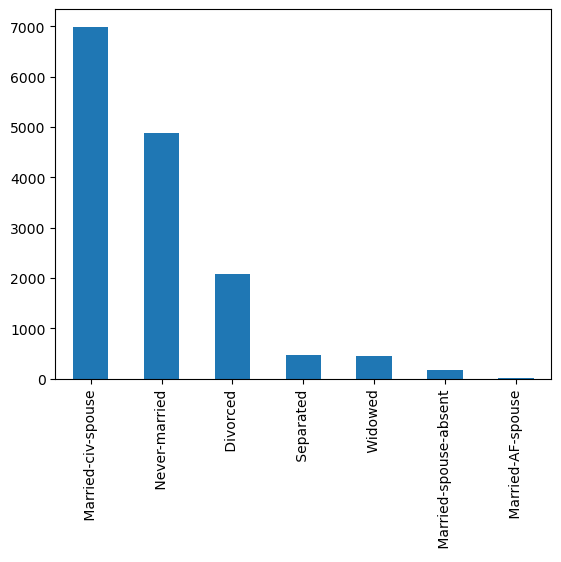

In [31]:
categorical_testing['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

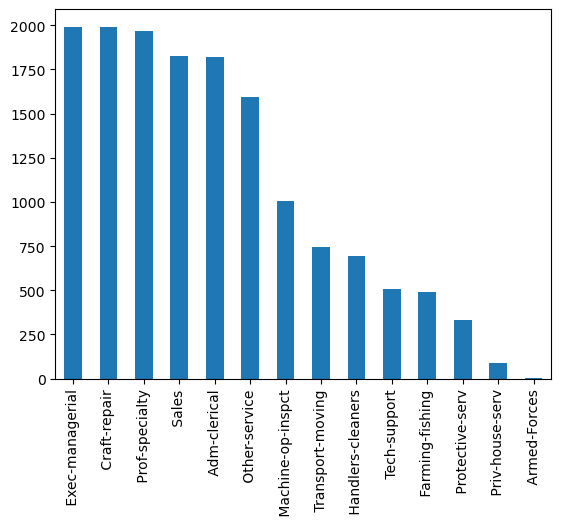

In [32]:
categorical_testing['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

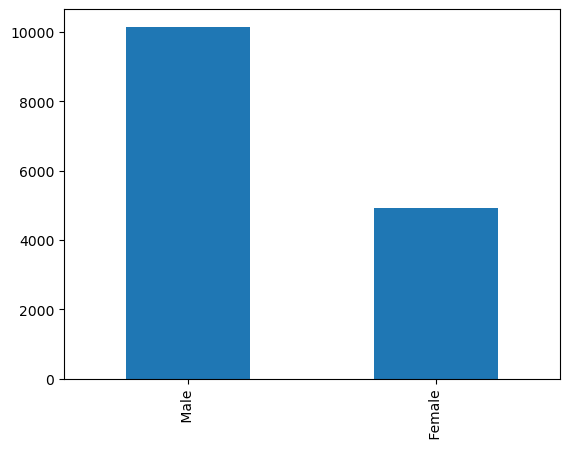

In [33]:
categorical_testing['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

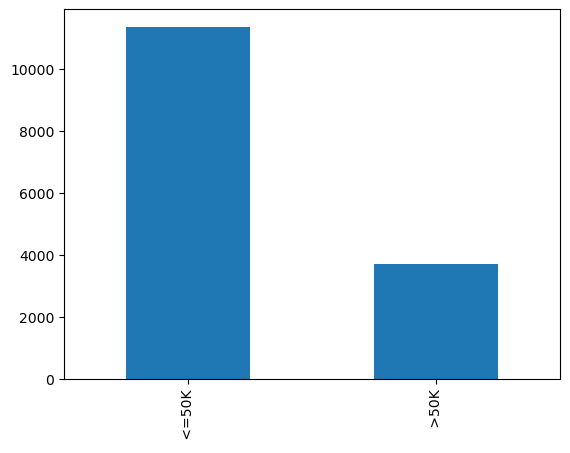

In [34]:
categorical_testing['Salary'].value_counts().plot(kind='bar')

In [35]:
total_data = pd.concat([training_data,testing_data])

In [36]:
total_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [37]:
total_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [38]:
total_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [39]:
total_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [40]:
total_data[total_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15053,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [43]:
total_data1 = total_data.drop_duplicates()

In [44]:
total_data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [71]:
total_data1.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.079642,0.001807,0.030211,-0.233279,-0.004676,-0.230643,0.044616,0.068483,0.075495,0.049876,0.066927,0.012129,0.214285
workclass,0.079642,1.000000,0.022333,0.041859,-0.031786,0.016217,-0.070247,0.059339,0.075331,0.031985,0.002649,0.047542,0.010469,0.015598
education,0.001807,0.022333,1.000000,0.366443,-0.043411,-0.020636,-0.010764,0.003913,-0.029864,0.035072,0.024082,0.060431,0.075014,0.094952
educationno,0.030211,0.041859,0.366443,1.000000,-0.069475,0.087334,-0.085939,0.033594,0.006596,0.129552,0.082594,0.136030,0.097527,0.329569
maritalstatus,-0.233279,-0.031786,-0.043411,-0.069475,1.000000,0.006666,0.155762,-0.075430,-0.109154,-0.042309,-0.033607,-0.167011,-0.026461,-0.181626
occupation,-0.004676,0.016217,-0.020636,0.087334,0.006666,1.000000,-0.061367,0.008746,0.061054,0.016952,0.010978,0.020983,0.004230,0.049738
relationship,-0.230643,-0.070247,-0.010764,-0.085939,0.155762,-0.061367,1.000000,-0.113604,-0.584810,-0.062712,-0.066390,-0.247737,-0.001036,-0.244911
race,0.044616,0.059339,0.003913,0.033594,-0.075430,0.008746,-0.113604,1.000000,0.085235,0.021099,0.031794,0.053968,0.116142,0.078779
sex,0.068483,0.075331,-0.029864,0.006596,-0.109154,0.061054,-0.584810,0.085235,1.000000,0.052882,0.053687,0.226747,-0.010639,0.212912
capitalgain,0.075495,0.031985,0.035072,0.129552,-0.042309,0.016952,-0.062712,0.021099,0.052882,1.000000,-0.036791,0.082977,0.012924,0.231529


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'workclass'),
  Text(2.5, 0, 'education'),
  Text(3.5, 0, 'educationno'),
  Text(4.5, 0, 'maritalstatus'),
  Text(5.5, 0, 'occupation'),
  Text(6.5, 0, 'relationship'),
  Text(7.5, 0, 'race'),
  Text(8.5, 0, 'sex'),
  Text(9.5, 0, 'capitalgain'),
  Text(10.5, 0, 'capitalloss'),
  Text(11.5, 0, 'hoursperweek'),
  Text(12.5, 0, 'native'),
  Text(13.5, 0, 'Salary')])

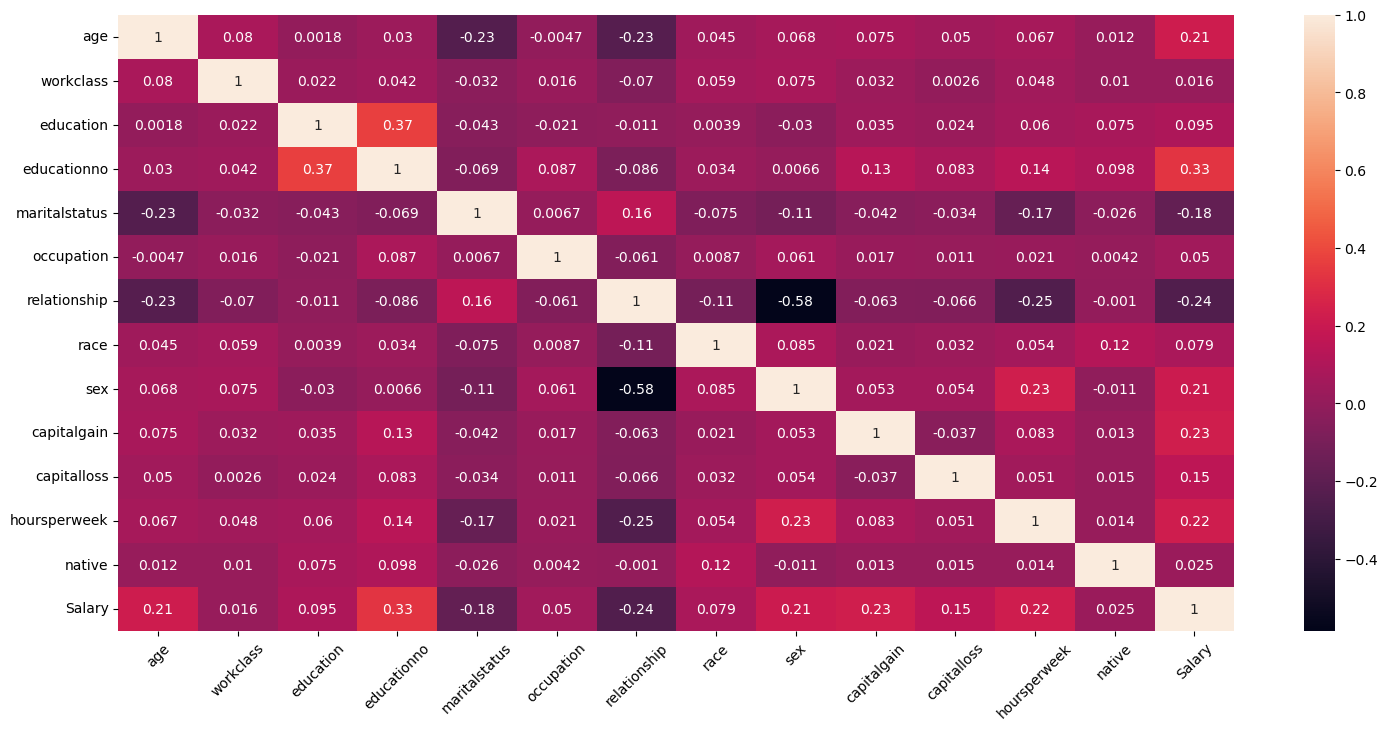

In [72]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(total_data1.corr(), annot=True);
plt.xticks(rotation=45)

In [77]:
# List of Numerical Variables
numerical_features=[feature for feature in total_data1.columns if total_data1[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
total_data1[numerical_features].head()

Number of numerical variables: 14


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [78]:
discrete_feature=[feature for feature in numerical_features if len(total_data1[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 9


In [79]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


## Univarient plot

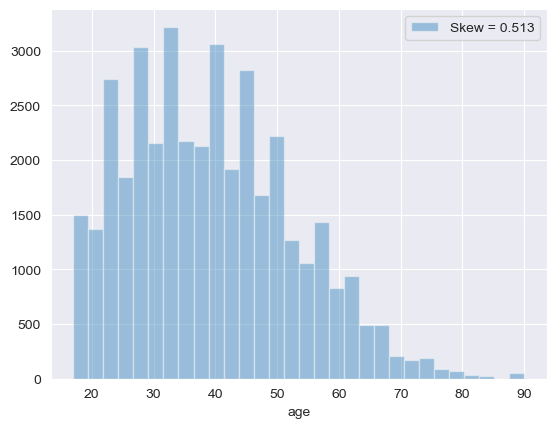

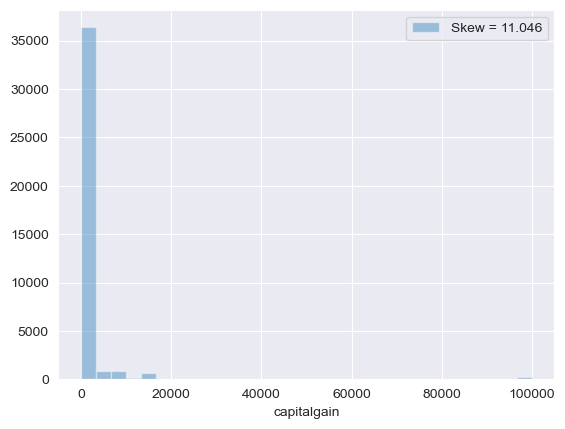

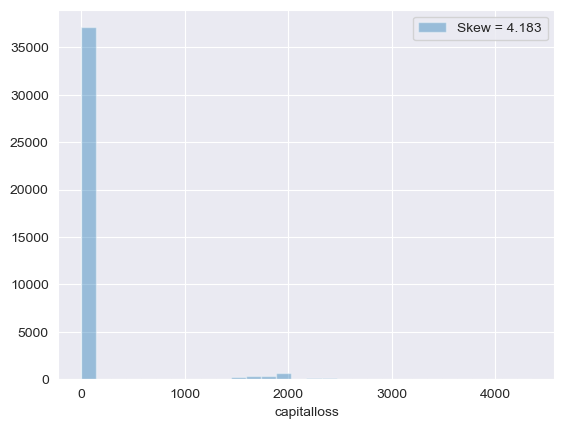

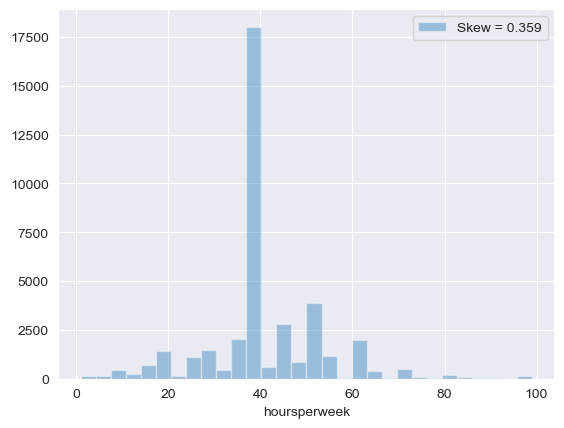

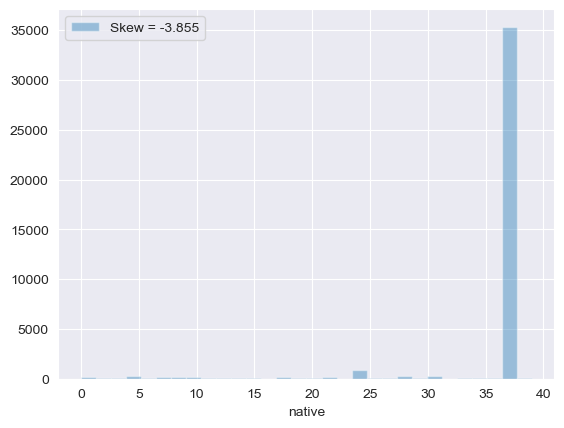

In [80]:
for feat in continuous_feature:
    skew = total_data1[feat].skew()
    sns.distplot(total_data1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [45]:
total_data1[total_data1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [46]:
le = LabelEncoder()
total_data1['workclass']=le.fit_transform(total_data1['workclass'])
total_data1['education']=le.fit_transform(total_data1['education'])
total_data1['maritalstatus']=le.fit_transform(total_data1['maritalstatus'])
total_data1['occupation']=le.fit_transform(total_data1['occupation'])
total_data1['relationship']=le.fit_transform(total_data1['relationship'])
total_data1['race']=le.fit_transform(total_data1['race'])
total_data1['sex']=le.fit_transform(total_data1['sex'])
total_data1['native']=le.fit_transform(total_data1['native'])
total_data1['Salary']=le.fit_transform(total_data1['Salary'])

In [47]:
total_data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,1,12,14,0,7,1,4,1,0,0,40,37,0
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


## Use minimax scalar

In [51]:
array = total_data1.values

In [52]:
scalar = MinMaxScaler()
scalar_data = scalar.fit_transform(array)
df = pd.DataFrame(scalar_data,columns=total_data1.columns)

In [53]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,0.424658,0.166667,0.800000,0.866667,0.000000,0.538462,0.2,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
39235,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
39236,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
39237,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


## Model building¶

In [54]:
x = df.drop(labels = 'Salary',axis = 1)
y = df[['Salary']]

In [55]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564


In [56]:
y.head()

,Salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<AxesSubplot:>

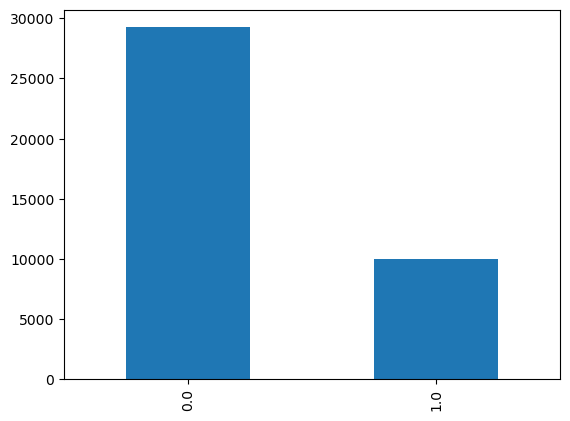

In [57]:
y['Salary'].value_counts().plot(kind = 'bar')

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [59]:
x_train.shape,y_train.shape

((27467, 13), (27467, 1))

In [60]:
x_test.shape,y_test.shape

((11772, 13), (11772, 1))

## Model training

In [61]:
svm_model = SVC(C=0.1,gamma=50,kernel='rbf',class_weight= {0:1,1:2})
svm_model.fit(x_train,y_train)

SVC(C=0.1, class_weight={0: 1, 1: 2}, gamma=50)

In [63]:
y_train_pred = svm_model.predict(x_train)

In [64]:
accuracy_score(y_train,y_train_pred)

0.8051479957767503

In [65]:
confusion_matrix(y_train,y_train_pred)

array([[18921,  1540],
       [ 3812,  3194]], dtype=int64)

In [66]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88     20461
         1.0       0.67      0.46      0.54      7006

    accuracy                           0.81     27467
   macro avg       0.75      0.69      0.71     27467
weighted avg       0.79      0.81      0.79     27467



In [67]:
# check testing data
y_test_pred = svm_model.predict(x_test)

In [68]:
accuracy_score(y_test,y_test_pred)

0.7921338769962624

In [69]:
confusion_matrix(y_test,y_test_pred)

array([[8114,  689],
       [1758, 1211]], dtype=int64)

In [70]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      8803
         1.0       0.64      0.41      0.50      2969

    accuracy                           0.79     11772
   macro avg       0.73      0.66      0.68     11772
weighted avg       0.78      0.79      0.78     11772



## Accuracy 79%